# Supporting Documentation for Ultima Rune Classification

This document contains references, code snippets, and trial-runs for the project

WARNING: This document is NOT guaranteed to be up-to-date

# Imagemagick commands
- Rotate 14 degree clockwise:
    ```
    $ convert -virtual-pixel Black -distort SRT 15 in.jpg out.jpg

    $ convert -rotate "14" in.jpg out.jpg
    ```
   
- Crop central region w by h pixels:
    ```
    $ convert -resize 200x200^ -gravity center -crop 200x200+0+0 in.jpg out.jpg

    $ convert -gravity center -crop 25x25+0+0 +repage in.jpg out.jpg
    ```
   
- resize image:
    ````
    $ convert -resize "250x250" in.jpg out.jpg
    ```

- square crop resize with padding
    ```
    $ convert -define jpeg:size=200x200 in.jpg -thumbnail '100x100>' -background black -gravity center -extent 100x100 out.jpg

    ```
- shear image
    ````
    $ convert -shear -20x-5 in.jpg out.jpg
    ````
    
- translate image:
    ```
    $ convert -page +520+520 -background White -flatten in.jpg out.jpg

    ```
    
- adjust brightness and contrast:
    ```
    $ convert -brightness-contrast -10x90 in.jpg out.jpg
    ```

- grayscale:
    ```
    $ convert -set colorspace Gray -separate -average in.jpg out.jpg 
    ```

- tresholding / binary coloring:
    ```
    $ convert -colorspace gray  +dither  -colors 2  -normalize bleh.jpg bleh1.jpg
    ```
    
- invert colors:
    ```
    $ convert -negate in.jpg out.jpg
    ```
    
- check out image details:
    ```
    $ identify in.jpg
    ```
    
- blur an image
    ```
    $convert -blur 3x8 in.jpg out.jpg
    ```
   
### References:

  - See the super excellent [Fred's Imagemagick Scripts for more](http://www.fmwconcepts.com/imagemagick/skew/index.php)
  - Or see this [shorter and more concise one](http://www.imagemagick.org/Usage/warping/)

# Generation of Training Images:

1. Capture image to ~ 52x55
2. Crop to 16x16, resizing down to 3 sizes - 16x, 19x, 22x
3. Grayscale
4. Brightness-Contrast to 30x60
5. Jiggle (Rotation x Displacement x color):
        rotation: 0, 5, 10, 15, 355, 350, 345
        displacement x: 0, 1, 2, 3, -1, -2, -3
        displacement y: 0, 1, 2, 3, -1, -2, -3

Total number of variation:

In [2]:
7*7*7*3

1029

# Python code - convert image into array
```
import PIL as pillow
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

im=Image.open("sample.jpg").convert("L")
imarr=np.array(im)
flatim=imarr.flatten('F')
```
imarr is a 2D array where each element contains values for one row of pixels. ```len(imarr)``` is the same as image height

flatim is now a 1D array
### References:
- See [this article from stack overflow](https://stackoverflow.com/questions/45896800/how-to-convert-image-to-dataset-to-process-machine-learning)

# Python - display image from array
Use this code:
```
img = Image.new("1", (5, 5))
pixels = img.load()
for i in range(img.size[0]):
    for j in range(img.size[1]):
        pixels[i, j] = data[i][j]

img.show()
img.save("img.png")
```
### References:
- See [this article from stack overflow](https://stackoverflow.com/questions/32144750/how-do-i-display-an-image-from-an-array-in-python)

# Python - from lists into dataframe
Use the following code:
```
import numpy as np
import pandas as pd

# generate some lists for example
r1=[1,2,3,4,5]
r2=[5,7,8,9,3]
r3=[0,9,8,7,6]

# make matrix from the lists
mm = np.matrix( list(zip( r1, r2, r3 )) ).transpose()

# make dataframe from matrix
df = pd.DataFrame( mm )
df.info()
```

In [16]:
## from lists to dataframe
import numpy as np
import pandas as pd

# generate some lists for example
r1=[1,2,3,4,5]
r2=[5,7,8,9,3]
r3=[0,9,8,7,6]

# make matrix from the lists
mm = np.matrix( list(zip( r1, r2, r3 )) ).transpose()

# make dataframe from matrix
df = pd.DataFrame( mm )
print(df)
print(df.info())


   0  1  2  3  4
0  1  2  3  4  5
1  5  7  8  9  3
2  0  9  8  7  6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
0    3 non-null int64
1    3 non-null int64
2    3 non-null int64
3    3 non-null int64
4    3 non-null int64
dtypes: int64(5)
memory usage: 200.0 bytes
None


## Python - test webcam
press 'q' to exit video capture

In [18]:
## test webcam
import cv2
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

# Python - Save Numpy array as image

Use this code:
```
# deprecated
import scipy.misc
scipy.misc.imsave('outfile.jpg', image_array)
```

```
import imageio
imageio.imwrite( 'somefilename', image_array )
```

#### References:
- Code examples [direct from imageio doc](https://imageio.readthedocs.io/en/stable/examples.html)
- This [stack overflow article - scroll down](https://stackoverflow.com/questions/902761/saving-a-numpy-array-as-an-image)

# Python - Multi-threading

Use this code:
```
from multiprocessing.dummy import Pool as ThreadPool 
pool = ThreadPool(4) 
results = pool.map(my_function, my_array)
```

which is the multi-threaded version of:
```
results = []
for item in my_array:
    results.append(my_function(item))
```

#### References:
See [this article from Stack Overflow](https://stackoverflow.com/questions/2846653/how-to-use-threading-in-python)

# Ultima Runes - step-by-step recipe:

0. List out target runes and filenames. Plus other required routines
1. Extract each rune into its own image file
2. Generate image files for training data and save pixels into csv file
3. Combine all csvs into one dataframe
4. Make test data, both generated and manual
4. Fit Machine Learning models
5. Test model predictions
6. Live classification of webcam image


## List out target runes and filenames. Plus other required routines

In [5]:
# libraries
import pandas as pd
import numpy as np
import os as os
import matplotlib.pyplot as plt
import PIL as pillow
from PIL import Image
from glob import glob
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import scipy.misc
import imageio
import cv2
import pickle

In [6]:
# globals vars
wr = 52
wh = 55
tw = 16
th = 16
rdir = "./Ultima"
idir = "./test/"
u_all = rdir + "/" + "u_all.png"

rune = pd.Series( ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"] )
filename = rdir + "/" + rune + ".jpg"
x_off = [  4,  63, 122, 181, 240, 299, 358, 417, 476, 535,   4,  63, 122, 181, 240, 299, 358, 417, 476, 535,   4,  63, 122, 181, 240, 299 ]
y_off = [ 38,  38,  38,  38,  38,  38,  38,  38,  38,  38, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 194, 194, 194, 194, 194, 194 ]
targetdf = pd.DataFrame(list(zip( rune, filename, x_off, y_off )) )
targetdf.columns = [ 'rune', 'filename', 'x_off','y_off' ]

# verify
print(targetdf.head())

  rune        filename  x_off  y_off
0    a  ./Ultima/a.jpg      4     38
1    b  ./Ultima/b.jpg     63     38
2    c  ./Ultima/c.jpg    122     38
3    d  ./Ultima/d.jpg    181     38
4    e  ./Ultima/e.jpg    240     38


In [7]:
### helper functions

# convert image pixels into np array
# one image into one array (row)
def img_to_row( filename, y="" ):
    im=Image.open( filename ).convert("L")
    imarr=np.array(im)
    #flatim=imarr.flatten('F') # checkout what the 'F' is for
    flatim=imarr.flatten()
    if(y):
        flatim=np.append(flatim, y)
    flatim=np.append(flatim, filename)
    return( flatim )




# convert raw image into input image suitable for making prediction
def raw_img_to_gen_img( filename ):
    apply_treshold( filename )
    square_resize_image( filename, (50, 50) )
    cut_base_img( filename, (50, 50), (16, 16), (0,0), filename )
    gen_img( filename, filename, 0, (16, 16), blur=False )



    
# wrapper function for raw_img_to_gen_img
def process_raw_testing_img( filename ):
    raw_img_to_gen_img( filename )
    return( filename )




# add a row of pixel array into the 'global' list
# NOTE that this does NOT return the appended list
def append_img_to_list( filename, listname ):
    arow = img_to_row( filename )
    listname = listname.append( arow )




# convert the list (of pixel rows) into pandas DataFrame
# WATCHOUT - will produce a list instead of a DataFrame if list elements dont have the same length
# Have not implemented check for uniform length of the elements of the input list
def list_to_df( listname, rune ):  
    mm = np.matrix( listname )
    df = pd.DataFrame( mm )
    df['rune'] = rune
    return(df)




# resize an image, and cropping it into square dimension at the same time
def square_resize_image( in_filename, crop_dim ):
    imc = 'convert -resize '+ str(crop_dim[1]) +'x'+ str(crop_dim[1]) +'^ -gravity center -crop '+ str(crop_dim[1]) +'x'+ str(crop_dim[1]) +'+0+0 '+ in_filename +' '+ in_filename
    os.system( imc )
    
    
    
    
# applies implosion and offsets to current rune
# then save it as an image file
def cut_current_rune(in_name, iii, og, oc, cr_name):
    # offset going
    imc = 'convert -page ' + og[0] + og[1] + ' -background White -flatten ' + in_name +' '+ cr_name
    os.system(imc)
    
    # implosion
    imc = 'convert -implode ' + iii +' '+ cr_name +' '+ cr_name
    os.system(imc)
      
    # offset coming
    imc = 'convert -page ' + oc[0] + oc[1] + ' -background White -flatten ' + cr_name +' '+ cr_name
    os.system(imc)
    
    
    
    
# make a 'base' image of specified dimension
# for use in generating training images as well as in recognition
def cut_base_img( in_filename, template_dim, final_dim, bright_con, out_filename ):
    # crop to template size
    imc = "convert -gravity center -crop "+ str(template_dim[0]) +"x"+ str(template_dim[1]) +"+0+0 "+ in_filename +" "+ out_filename
    os.system( imc )
    
    # grayscale
    imc = "convert -set colorspace Gray -separate -average " + out_filename +" "+ out_filename
    os.system( imc )
    
    # inverse colors
    imc = "convert -negate " + out_filename +" "+ out_filename
    os.system( imc )
    
    # adjust brightness-contrast
    #imc = "convert -brightness-contrast "+ str(bright_con[0]) +"x"+ str( bright_con[1] ) +" "+ out_filename +" "+ out_filename
    #os.system( imc )
    
    # grayscale
    #imc = "convert -set colorspace Gray -separate -average " + out_filename +" "+ out_filename
    #os.system( imc )
    
    # clean noisy artifacts
    cleanse_img( out_filename, 32 )


    
    
# skews an image 
# done before cutting base image
def skew_current_rune( in_filename, sx, sy, out_filename ):
    imc = "convert -shear " + sx +"x"+ sy +" "+ in_filename +" "+ out_filename
    os.system( imc )
    
    
# returns a tuple
# containing the outermost pixel locations where
# value of the pixels is above threshold
def scan_boundaries( img, threshold, lims, axis ):
    blo = lims[0]
    bhi = lims[1]
    if(axis == 0): # vertical
        i = blo - 1
        while( i < bhi+1 ):
            i = i + 1
            if( any( img[i,:] > threshold ) ):
                blo = i
                break
        i = bhi
        while( i > blo-1 ):
            i = i - 1
            if( any( img[i,:] > threshold ) ):
                bhi = i
                break
        
    elif(axis == 1): # horizontal
        i = blo - 1
        while( i < bhi+1 ):
            i = i + 1
            if( any( img[:,i] > threshold ) ):
                blo = i
                break
        i = bhi
        while( i > blo-1 ):
            i = i - 1
            if( any( img[:,i] > threshold ) ):
                bhi = i
                break
    return( (blo, bhi) )




# cleans noie pixels
# value below threshold converted to zero
def cleanse_img(filename, threshold=32):
    im = np.asarray(pillow.Image.open(filename))
    im.setflags(write=1)
    im[ im < threshold ] = 0
    #scipy.misc.
    
    
    
    ( filename, im ) # deprecated
    imageio.imwrite( filename, im )
    
    

# crops the image down to remove spaces at four edges of the image
# assumes image is graysacale, space is very black, and non-space is defined by threshold value
# returns two tuples, vertical boundaries top-bottom, and horizontal boundaries left-right
# finds out the boundaries and tightly trim an image
def crop_to_boundaries( filename, threshold ):
    im = np.asarray(pillow.Image.open(filename))
        
    # initialization
    top=0
    bottom=im.shape[0]
    left=0
    right=im.shape[1]
    
    # find values
    vbounds = scan_boundaries( im, threshold, (top, bottom), 0 )
    hbounds = scan_boundaries( im, threshold,  (left, right), 1 )
    # tight trim, throw away the spaces
    im = im[ vbounds[0]:vbounds[1], hbounds[0]:hbounds[1] ]
    # save as image
    #scipy.misc.imsave(filename, im) # deprecated
    imageio.imwrite( filename, im )

    
# generate a new image by 'jiggling' a base image using Imagemagick
# must already have a 'base' image first
# WATCHOUT for images not having desired target dimension, as a result of buggy imagemagick commands
def gen_img( in_filename, out_filename, rot, final_dim=(16, 16), bright_con=(0,80), blur=True ):
    # apply rotation
    imc = "convert -virtual-pixel Black -distort SRT "+ str(rot) +" "+ in_filename +" "+ out_filename
    os.system( imc )
    
    # crop to boundaries
    crop_to_boundaries( out_filename, 192 )
        
    # crop and rescale to final size
    imc = "convert -define jpeg:size="+ str(35) +"x"+ str(19) +" "+ out_filename +" -thumbnail '" + str(final_dim[0]) +"x"+ str(final_dim[1]) +">' -background black -gravity center -extent "+ str(final_dim[0]) +"x"+ str(final_dim[1]) +" "+ out_filename
    os.system( imc )
    
    # adjust brightness-contrast
    imc = "convert -brightness-contrast "+ str(bright_con[0]) +"x"+ str( bright_con[1] ) +" "+ out_filename +" "+ out_filename
    os.system( imc )
    
    # grayscale
    #imc = "convert -set colorspace Gray -separate -average " + out_filename +" "+ out_filename
    #os.system( imc )
    
    # apply bicolorization
    #imc = 'convert -colorspace gray  +dither  -colors 2  -normalize '+ out_filename +' '+ out_filename
    #os.system( imc )
    
    # clean noisy artifacts
    cleanse_img( out_filename, 32 )

    # apply blur
    if( blur ):
        imc = 'convert -blur 1x1 ' + out_filename +" "+ out_filename
        os.system(imc)

    

    
# high-level function that takes a rune image, create a 'base' image, and then 'jiggled' images
# converting all final images into a list,
# abd then a DataFrame
# saved as a csv file of the rune
def process_rune( rune ):
    rdir = "./Ultima"
    in_name = rdir + "/" + rune + ".jpg"
    cr_name = in_name
    base_name = rdir + "/" + rune + "_base.jpg"    
    out_name = rdir + "/" + rune + "_out.jpg"
        
    rots = [0, 3, 6,  357, 354 ]
       
    implodes = [ "-0.15", "0", "0.15" ]
    
    r_x_offs_g = [ "+8", "+0", "-8" ]
    r_x_offs_c = [ "-8", "+0", "+8" ]
    
    r_y_offs_g = [ "+8", "+0", "-8" ]
    r_y_offs_c = [ "-8", "+0", "+8" ]
    
    shear_x = ["-7", "-10", "7", "10" ]
    shear_y = [ "0", "-8", "8"  ]
    
    
    template_dim = (50, 50)
    base_dim = (16, 16)
    bright_con = (30, -50)

    big_list = []
    
    for iii in implodes:
        for xxx in range(0,len(r_x_offs_g)):
            for yyy in range(0, len(r_y_offs_g)):
                xog = r_x_offs_g[xxx]
                xoc = r_x_offs_c[xxx]
                yog = r_y_offs_g[yyy]
                yoc = r_y_offs_c[yyy]
                if( (iii!="0") | ( (iii=="0") & (xog=="+0") & (yog=="+0") ) ):
                    cr_name = rdir + "/" + rune + "_" + iii + xog + yog + ".jpg"
                    cut_current_rune(in_name, iii, (xog, yog), (xoc, yoc), cr_name)
    
                    for sx in shear_x:
                        for sy in shear_y:
                            cr_name2 = rdir + "/" + rune + "_sheared_" + sx + sy + ".jpg"
                            skew_current_rune( cr_name, sx, sy, cr_name2 )
    
                            # make a base
                            cut_base_img( cr_name2, template_dim, base_dim, bright_con, base_name )
                            # jiggle and add to list
                            for rr in rots:
                                gen_img( base_name, out_name, rr, base_dim )
                                append_img_to_list( out_name, big_list )
                                #os.system("rm " + out_name)
        
        # make df
    df = list_to_df( big_list, rune )
    df['rune'] = rune
    # save df
    df.to_csv( rdir+"/"+rune+".csv", index=False )
    return( rdir+"/"+rune+".csv" )

    

    
# display pixel array as image
def show_as_image(sample):
    bitmap = sample.reshape((16, 16))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()
    
    
    

# applies binarizer treshold to image using Imagemagick
def apply_treshold( fname="X_new.jpg", bright_con=(5, 10) ):
    imc = "convert -brightness-contrast "+ str(bright_con[0]) +"x"+ str( bright_con[1] ) +" "+ fname +" "+ fname
    os.system( imc )
    imc = 'convert -colorspace gray  +dither  -colors 2  -normalize '+ fname +' '+ fname
    os.system( imc )
    
    
    
    
def classify_rune( models, X_new ):
    ret = '?'
    preds = []
    for m in models:
        y_new = m.predict( X_new )
        # print(y_new) # uncomment to debugcat15grey
        
        preds.append(y_new)
    
    preds = pd.Series(preds)    
    freqs = preds.value_counts()
    maj = freqs.index[ freqs > 1 ]
    if( len(maj) > 0 ):
        ret = maj[0]
    return( ret )
   
    
    
    
# high level function to save captured frame, apply transformations, and then predict using trained classifier    
def read_runes( models, fname = "X_new.jpg" ):
    raw_img_to_gen_img( idir+fname )
    X_new = img_to_row( idir+fname )[0:-1] # last element is filename
    X_new = np.array(X_new).astype(np.float).reshape(1, -1)
    show_as_image( X_new )
    rune = ( classify_rune( models, X_new ) )[0]
    msg = 'This is a rune for: ' + rune
    print( msg )    
    # speak out the message
    os.system( "espeak '"+ msg +"'")
    
    

# ensures x is within range of min max
def clamp(x):
    if( x < 100 ):
        x = 0
    elif( x > 255 ):
        x = 255
    return( x )


# applies noise to the images and save to file
def make_testing_df( in_df, noise_sd=10 ):
    for i in range(0, in_df.shape[0]-1):
        in_df.iloc[i,:256] = (in_df.iloc[i,:256] + np.random.normal(loc=0.0, scale=noise_sd, size=None)).apply(clamp)
    in_df.to_csv(idir+"gen_testing_nsd_"+str(noise_sd)+".csv", index=False)
    return( in_df )




# make confusion matrix and classification report
def conf_classif_report( model, X_test, y_test ):
    # Predict the labels of the test data: y_pred
    y_pred = model.predict( X_test )

    # Generate the confusion matrix and classification report
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


    
# save a trained model
def save_a_model( filename, model ) :
    filename = 'knn_n3_train_blur'
    outfile = open(filename,'wb')
    pickle.dump(knn,outfile)
    outfile.close()
    print( filename + " saved." )
    
    
    
    
# load a saved model
# WARNING: no error handling yet
def load_a_model( filename ):
    infile = open(filename,'rb')
    model = pickle.load(infile)
    infile.close()
    print( filename + " loaded." )
    return( model )

## Extract each rune into its own image file
#### Into size 52x56

In [20]:
# extract each rune into own file
for r in range(0,targetdf.shape[0]):
    im_command =  "convert -crop " + str(wr) + "x" + str(wh) + "+" + str(targetdf.x_off[r]) + "+" + str(targetdf.y_off[r]) + " +repage " + u_all + " " + targetdf.filename[r]
    os.system( im_command )

#### Inspect

./Ultima/a.jpg


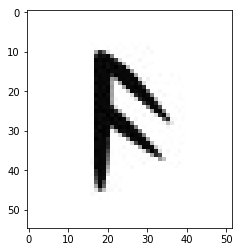

./Ultima/f.jpg


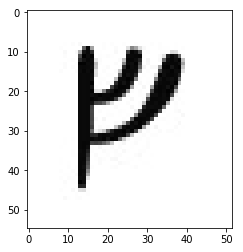

./Ultima/k.jpg


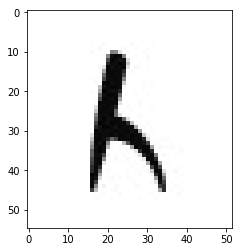

./Ultima/p.jpg


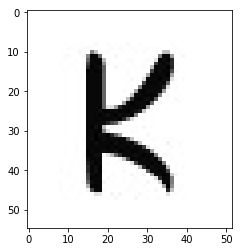

./Ultima/u.jpg


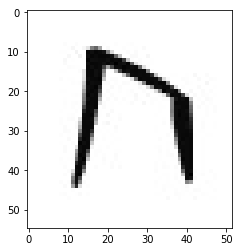

./Ultima/z.jpg


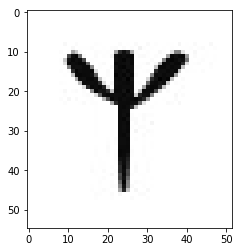

In [18]:
#test inspect some images
n_images=5
for i in range(0,targetdf.shape[0], int( np.round(targetdf.shape[0] / n_images) ) ):
    filename = rdir +"/"+ targetdf.rune[i] + ".jpg" 
    print( filename )
    img = imageio.imread( filename ) 
    plt.imshow( img, cmap="gray" )
    plt.show()

## Generate image and csv files for training data

For each rune, slight variations were programmatically generated and added into the overall training dataset.

These slight variations cover( order may not exactly be the same as in actual program flow, as the code is still evolving ):
1. a set of implosions, on a set of grid offsets
2. a set of skewness (shearing)
4. cropping to 'base' size
5. convert to grayscale
6. inverse colors so that "white" (255) represents full value and "black" (0) represents nothingness
7. "clean" noise, pixels containing some small value below a certain threshold are set to 0
8. apply rotation, over a set of degrees
9. "tightly" crop the base image into the dimension that has no blank borders (base image still have blank borders)
10. resize down to final training size suitable for Machine Learning (in this case its 16x16)
11. apply brightness x contrast filter
12. clean noise pixels (again, since rescaling and brightness x contrast adjustment may introduce noise)
12. applyl blur, to widen the 'matching area' to help minimize distance in KNN models
13. convert this final image into a row and accumulate over all combination of set values (implosions, shears, offsets, rotations, etc)

The current code produces slightly over 1000 training images per rune image.

The accumulated rows are then saved as a CSV file. The code produces one CSV file per rune.

In [19]:
## test process_rune()
process_rune('a')
print('done')

done


(1140, 258)

In [20]:
# inspect
aa = pd.read_csv('./Ultima/a.csv')
aa.shape

(1140, 258)

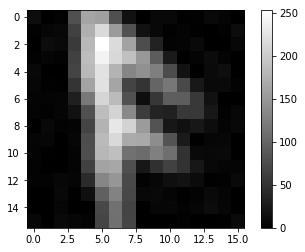

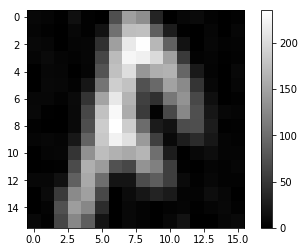

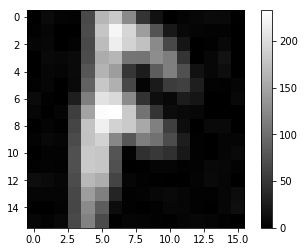

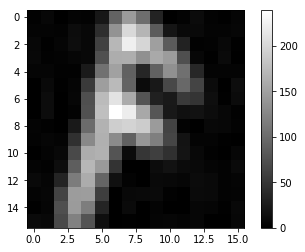

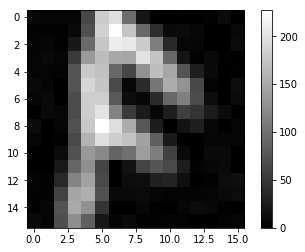

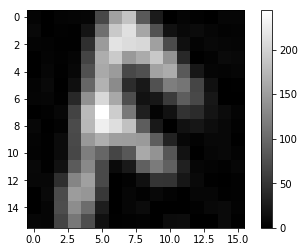

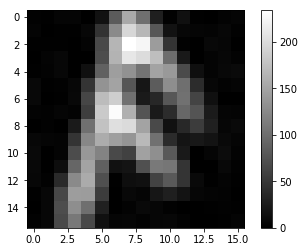

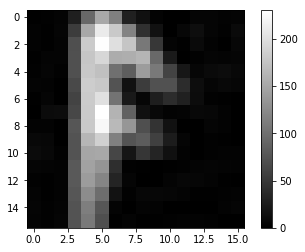

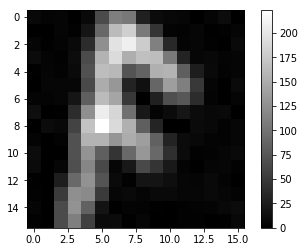

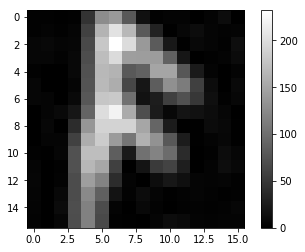

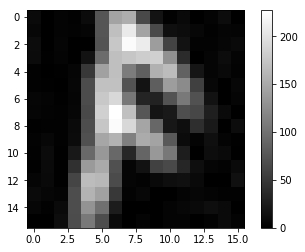

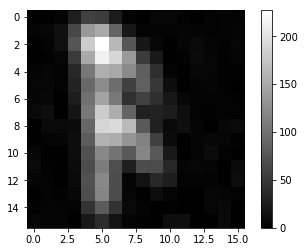

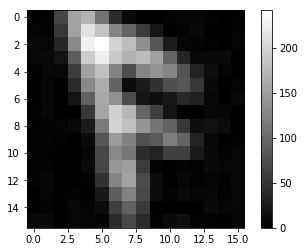

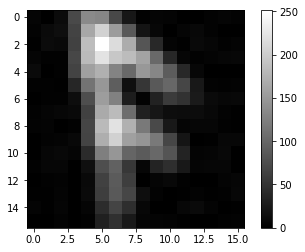

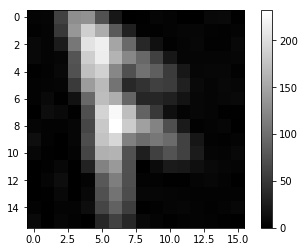

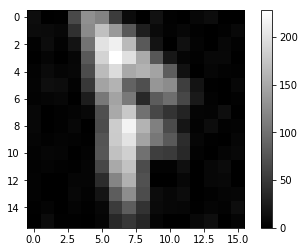

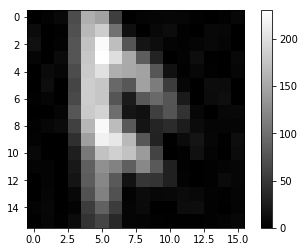

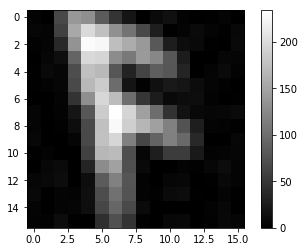

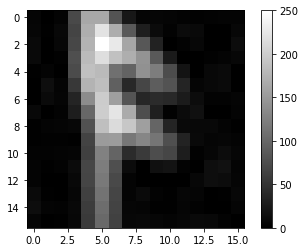

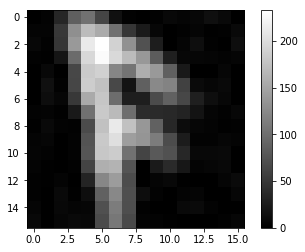

In [21]:
#test inspect some images
n_images=20
for i in range(0,aa.shape[0], int( np.round(aa.shape[0] / n_images) ) ):
    show_as_image( aa.iloc[i,0:256].values.astype("float") )

If everything looks OK, continue processing the rest of the runes

In [4]:
# multi-threading
from multiprocessing.dummy import Pool as ThreadPool 
pool = ThreadPool(4) 
results = pool.map(process_rune, targetdf['rune'][9:27])


In [5]:
# inspect
print( results )

['./Ultima/j.csv', './Ultima/k.csv', './Ultima/l.csv', './Ultima/m.csv', './Ultima/n.csv', './Ultima/o.csv', './Ultima/p.csv', './Ultima/q.csv', './Ultima/r.csv', './Ultima/s.csv', './Ultima/t.csv', './Ultima/u.csv', './Ultima/v.csv', './Ultima/w.csv', './Ultima/x.csv', './Ultima/y.csv', './Ultima/z.csv']


## Combine all csvs into one dataframe

Assemble all the CSVs produced above into one big DataFrame, for training purpose

In [5]:
filenames = glob( "./Ultima/?.csv" )
dfs = [ pd.read_csv( f ) for f in filenames]
all_df = pd.concat(dfs, sort=False)

In [6]:
# inspect
print( all_df.info() )
print( all_df.shape )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29640 entries, 0 to 1139
Columns: 258 entries, 0 to rune
dtypes: int64(256), object(2)
memory usage: 58.6+ MB
None
(29640, 258)


## Inspect Certain Rune
Use the code below to graphically inspect certain runes

(1140, 257)


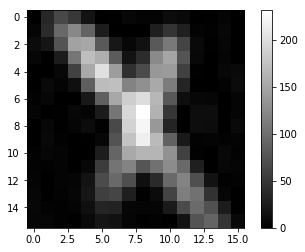

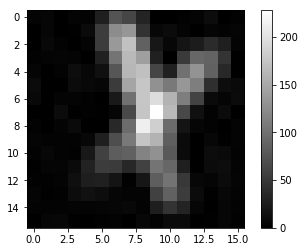

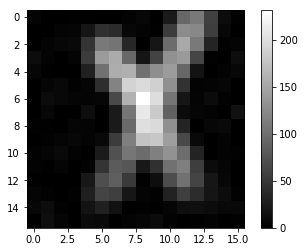

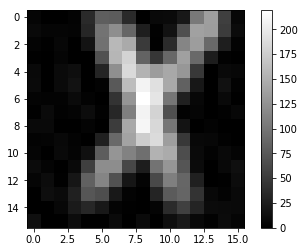

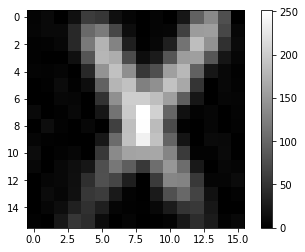

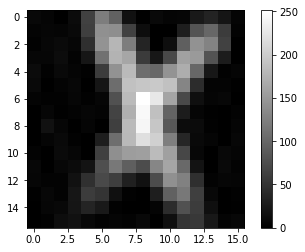

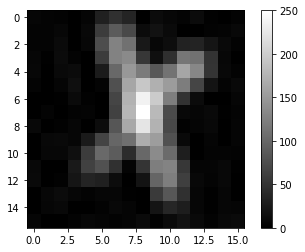

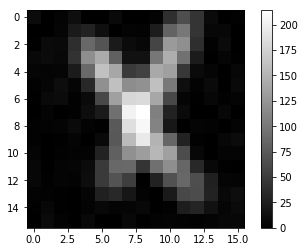

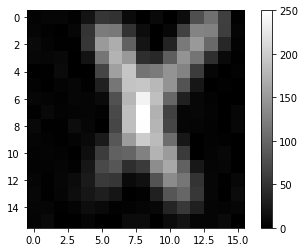

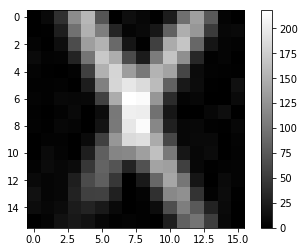

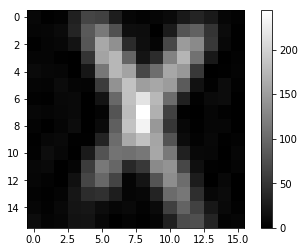

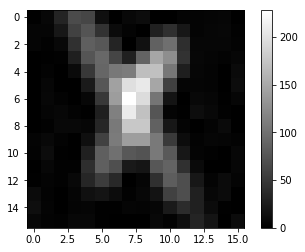

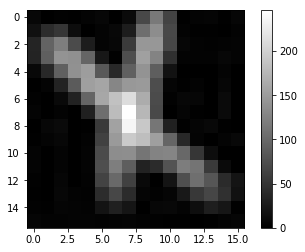

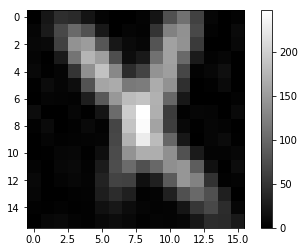

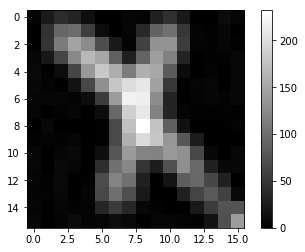

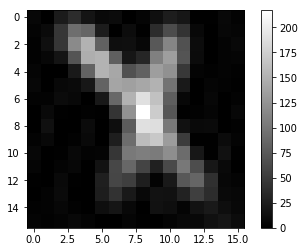

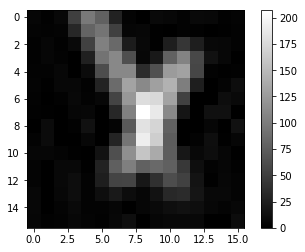

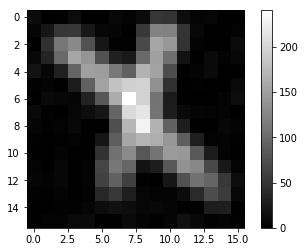

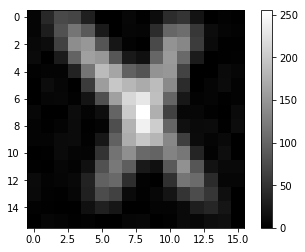

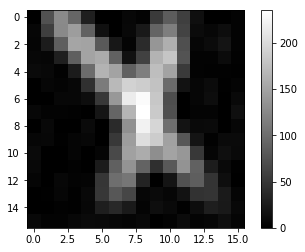

In [41]:
grp_ixs = all_df.loc[:, 'rune'] == 'g'    
n_images = 20
grp = all_df[ grp_ixs ].iloc[:,0:257]
print(grp.shape)
for r in range(0, grp.shape[0], int( np.round(grp.shape[0] / n_images) ) ):
    data = grp.iloc[r,0:256].values .astype('float')
    show_as_image( data )


## Reduce to a smaller sample size
ONLY IF NECESSARY 

To help speed up things while in development

In [19]:
all_df = all_df.sample( frac = 0.05, replace = False )

# Make test data
Two kinds of test data: Generated and Manual
### Generated Test Data
Generated test data is programmatically created from the training data by adding noise to the brightness value of the pixels in the training images

In [50]:
# generate
testing_df = make_testing_df( all_df, noise_sd=55 )
print( testing_df.shape)

(29640, 258)


In [289]:
# load pre geneerated data
testing_df = pd.read_csv(idir+'gen_testing_nsd_40.csv')
print(testing_df.shape)

In [51]:
# sample to manageable size
# ONLY IF NECESSARY
testing_df = testing_df.sample(frac=0.1, replace=False)
testing_df.shape

(2964, 258)

### Use Generated test data

In [52]:
X_test = testing_df.iloc[:,0:256]
y_test = testing_df.iloc[:,256].values
y_name = y_test + '_generated'

### Inspect Generated test data

./Ultima/s_out.jpg


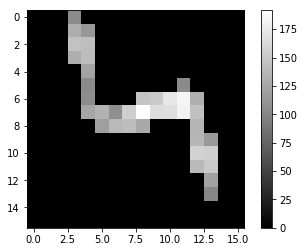

./Ultima/w_out.jpg


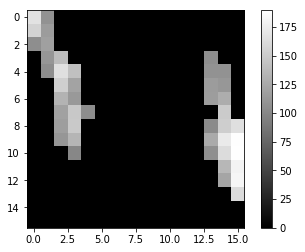

./Ultima/t_out.jpg


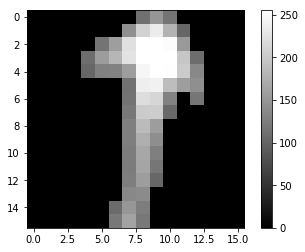

./Ultima/f_out.jpg


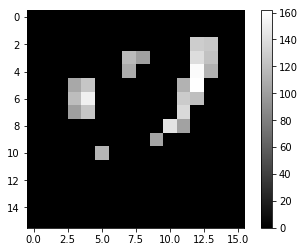

./Ultima/m_out.jpg


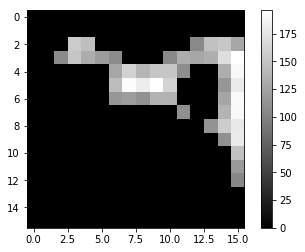

In [53]:
# check
testing_df.head()
X_test = testing_df.iloc[:,0:256]
y_test = testing_df.iloc[:,256].values.ravel()
for i in range(0,5):
    print(y_test[i])
    show_as_image( X_test.iloc[i,:].values.astype("float") )


### Manual Test Data
Manual Test data uses handwritten rune characters which were scanned and then processed into a DataFrame. This covers 700+ handwritten runes, with each rune replicated about 20-40 times.

### Processing
All jpg files with the pattern 't_?_*.jpg' will be processed.
These files were produced from:
1. image files with pattern 'test_?_*.jpg', placed under ```./test/``` directory
2. running ```process.sh``` on the directory where those files above were located

In [4]:
filenames = glob( "./test/t_?_*.jpg" )

results = [ process_raw_testing_img( f ) for f in filenames]
print(len(results))

rows = [ img_to_row( f, f[9] ) for f in filenames]
manual_test_df = pd.DataFrame(rows)
print( manual_test_df.head() )
print( manual_test_df.shape )

784
  0   1   2   3   4   5    6    7    8   9          ...          248 249  250  \
0   0   2   1   7   0  15    0    1    6   0        ...            0  11    0   
1   0  11   4   0   7  10    0  230  253   3        ...          224   3    0   
2   0  12   1   0   3   0  246    3    4   0        ...            0   0    8   
3   0   7   0   3   2   0    5  249  254   6        ...            0   3  249   
4   0   0   1   0   5   0  116  246  227   0        ...            0   4    9   

   251 252  253 254 255 256                257  
0    0  13  250   0   0   w  ./test/t_w_09.jpg  
1    0  10    3   7   0   x  ./test/t_x_34.jpg  
2    7   0    0   1   0   a  ./test/t_a_17.jpg  
3    0   0    0   0   5   k  ./test/t_k_13.jpg  
4  241   5    0  11   1   k  ./test/t_k_25.jpg  

[5 rows x 258 columns]
(784, 258)


### Inspect some samples

./test/t_w_09.jpg


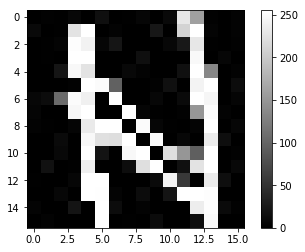

./test/t_x_34.jpg


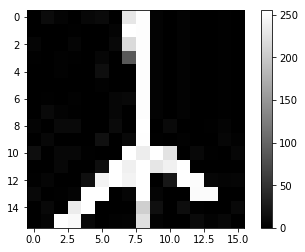

./test/t_a_17.jpg


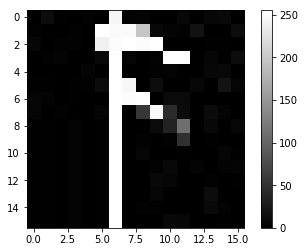

./test/t_k_13.jpg


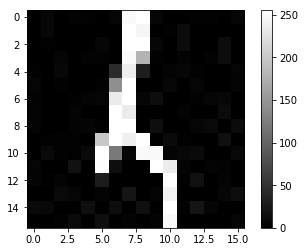

./test/t_k_25.jpg


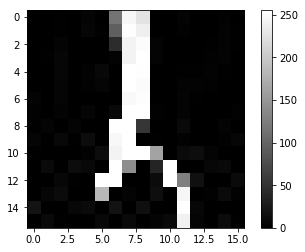

./test/t_k_14.jpg


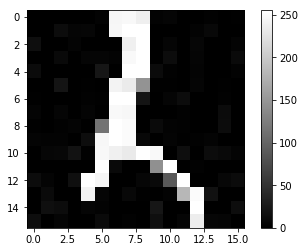

./test/t_v_24.jpg


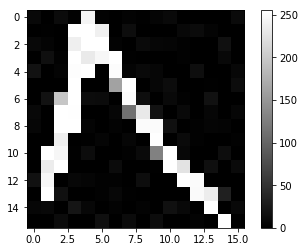

./test/t_g_09.jpg


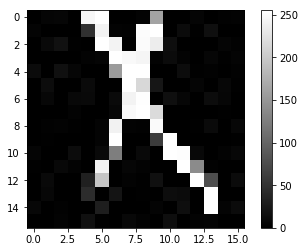

./test/t_m_18.jpg


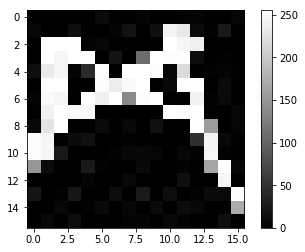

./test/t_o_01.jpg


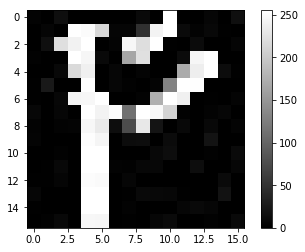

./test/t_y_05.jpg


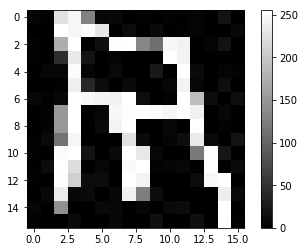

./test/t_l_14.jpg


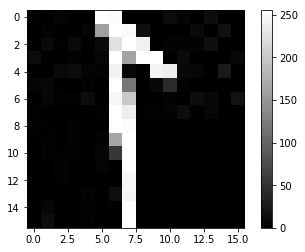

./test/t_s_24.jpg


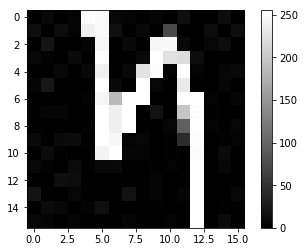

./test/t_z_20.jpg


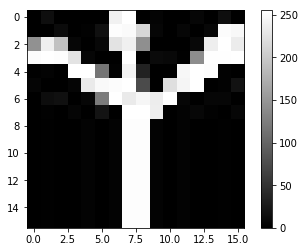

./test/t_p_24.jpg


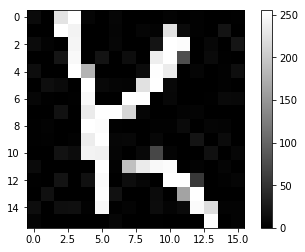

./test/t_m_16.jpg


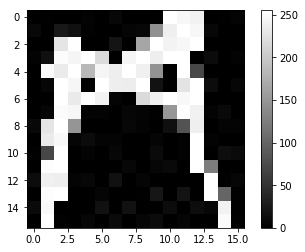

./test/t_j_08.jpg


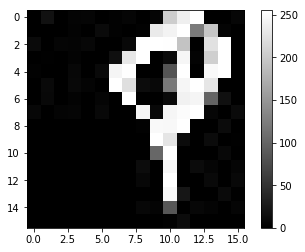

./test/t_v_23.jpg


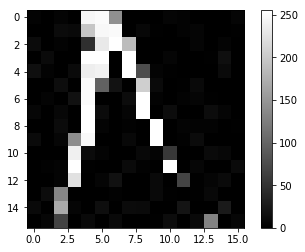

./test/t_q_11.jpg


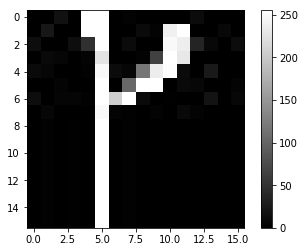

./test/t_j_26.jpg


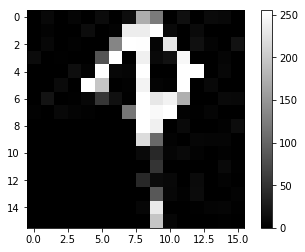

./test/t_d_22.jpg


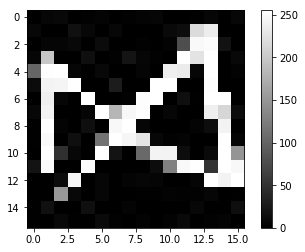

./test/t_w_21.jpg


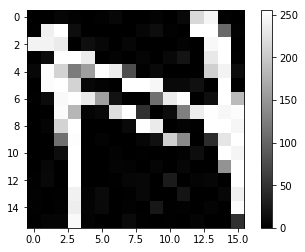

./test/t_a_01.jpg


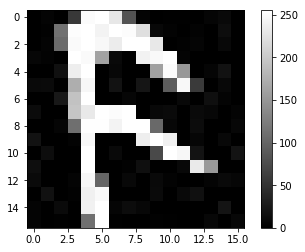

./test/t_o_27.jpg


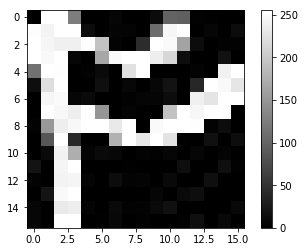

./test/t_g_13.jpg


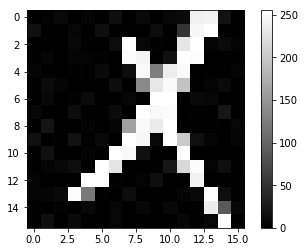

In [6]:
for rr in range(0, len( rows[:25]) ):
    print( rows[rr][257] )
    show_as_image( rows[rr][0:256].astype(np.float) )
    
# if already have X_test
#for rr in range(0, X_test.shape[0]):
#    show_as_image( X_test.iloc[rr,:].values )

### Save to disk
this will save the manually processed test data into a file

In [7]:
manual_test_df.to_csv( './test/manual_test_df.csv', index=False )

### Load Manual Test Data

In [9]:
manual_test_df = pd.read_csv( './test/manual_test_df.csv', header=None )
manual_test_df.shape

(785, 258)

### Use Manual Handwriting as Test data

In [10]:
X_test = manual_test_df.iloc[:,:256].astype( np.float )
y_test = manual_test_df.iloc[ :, 256 ]
y_name = manual_test_df.iloc[ :, 257] 

## Fit Machine Learning models

Three types of models used:
- Plain single K-Nearest Neighbor, with n=3 neighbors
- GridSearch Cross-vallidated KNN
- SVM with polylnomial kernel

In [20]:
all_df.shape

(29640, 258)

### Plain Single KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



X = all_df.iloc[:,:256]
y = all_df.iloc[:,-1:]

#plain single KNN
knn = KNeighborsClassifier( n_neighbors = 3 )
knn.fit(X, y.values.ravel())



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
y_pred = knn.predict(X_test)
print( confusion_matrix( y_test, y_pred ) )
print( classification_report( y_test, y_pred ) )

# ROC / AUC
#y_pred_prob = knn.predict_proba( X_test )
#fpr, tpr, thresholds = roc_curve( y_test, y_pred_prob )

# plot ROC curve
#plt.plot( [0,1], [0,1], 'k--' )
#plt.plot( fpr, tpr, label='KNN 2' )
#plt.xlabel( 'FALSE positive rate' )
#plt.ylabel( 'TRUE positive rate' )
#plt.title( 'ROC Curve - KNN 2' )

# display AUC
#print( roc_auc_score( y_test, y_pred_prob ) )

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0 16  0  0  0  2  0  7  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0
   0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  2
   0  0  0]
 [ 0  0  0  0  0 14  0  0  0  0  0  0  0  4  0  0  0  1  0  0  0  0  0  0
   0  0  1]
 [ 0  5  0  0  0  0  7  0  1  1  0  0  0  0  0  0  0 21  0  0  1  0  0  0
   0  0  0]
 [ 0  0  0  5  0  0  0 26  0  3  0 11  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  1]
 [ 0  3  0  0  0  0  2  0 20  0  0  0  2  0  0  0  1  1  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  4  0 13  0  0  0  0  0  0  0  0  0 10  0  0  0
   0  0  4]
 [ 0  0  0 18  0  0  0  0  0  0  0 14  0  0  0  0  0  

/home/david/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### GridSearchCV KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split




X = all_df.iloc[:,:256]
y = all_df.iloc[:,-1:]

# use GridSearch
param_grid = {'n_neighbors' : np.array( [1,2,3] )} #.arange(3,8)

knn = KNeighborsClassifier()

knn_cv = GridSearchCV( knn, 
                      param_grid, 
                      cv=2
                      #n_jobs = 4
                     )

knn_cv.fit( X, y.values.ravel() )



GridSearchCV(cv=2, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([1, 2, 3])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
print( knn_cv.best_score_ )
print( knn_cv.best_params_ )

y_pred = knn_cv.predict( X_test )
print( confusion_matrix( y_test, y_pred ) )
print( classification_report( y_test, y_pred ) )

0.9988191632928475
{'n_neighbors': 3}
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0 16  0  0  0  2  0  7  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0
   0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  2
   0  0  0]
 [ 0  0  0  0  0 14  0  0  0  0  0  0  0  4  0  0  0  1  0  0  0  0  0  0
   0  0  1]
 [ 0  5  0  0  0  0  7  0  1  1  0  0  0  0  0  0  0 21  0  0  1  0  0  0
   0  0  0]
 [ 0  0  0  5  0  0  0 26  0  3  0 11  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  1]
 [ 0  3  0  0  0  0  2  0 20  0  0  0  2  0  0  0  1  1  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  4  0 13  0  0  0  0  0  0  0  0  0 10  0  0  0
   0  0  4]
 [ 0  0  0 18  0

/home/david/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
print(knn_cv.best_score_)
print(knn_cv.best_params_)

0.9988191632928475
{'n_neighbors': 3}


### SVM modelling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X = all_df.iloc[:,:256]
y = all_df.iloc[:,-1:]

#Create a svm Classifier
clf = svm.SVC(kernel='poly') 

# single SVM run
clf.fit(X, y.values.ravel())


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
y_pred = clf.predict(X_test)
print( confusion_matrix( y_test, y_pred ) )
print( classification_report( y_test, y_pred ) )


[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  5 14  1  0  0  0  0  4  0  0  0  1  0  0  0  0  0  1  0  0  1  0  0
   0  0  0]
 [ 0  0  0 13  0  0  0  0  0  1  0  2  0  0  0  0  0  0  0  0  0  4  0  0
   0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2
   0  0  0]
 [ 0  0  0  0  0 15  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  3]
 [ 0  7  0  1  0  0 10  0  0  3  0  0  2  0  0  0  1  9  0  0  0  1  0  0
   0  0  2]
 [ 0  9  0  3  0  0  1 25  1  2  0  3  0  0  0  0  0  0  0  0  0  0  0  0
   2  0  0]
 [ 0  9  0  0  0  0  2  0 15  0  0  0  1  0  0  0  2  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  1  0  0  0  0  0  0  3  0 10  0  0  0  0  0  0  0  0  0  7  0  0  0
   0  1  9]
 [ 0  1  0 15  0  0  0  0  0  0  0 15  2  0  0  0  0  

/home/david/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Save Trained model

In [309]:
save_a_model( "knn_n3_train_blur", knn )
save_a_model( "knn_cv_train_blur", knn_cv )
save_a_model( "clf_poly_train_blur", clf )

## Load Trained model

In [8]:
knn = load_a_model( "knn_n3_train_blur" )
knn_cv = load_a_model( "knn_cv_train_blur" )
clf = load_a_model( "clf_poly_train_blur" )

knn_n3_train_blur loaded.
knn_cv_train_blur loaded.
clf_poly_train_blur loaded.


## Testing model predictions

#### Check prediction on specific rune
This will show each test data as an image, the values predicted by the three models, and number of correct classification
It will also save an output file to the disk

./test/t_b_21.jpg
sum : 3
knn : b
knn_cv : b
clf : b


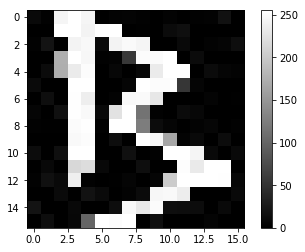

./test/t_b_11.jpg
sum : 3
knn : b
knn_cv : b
clf : b


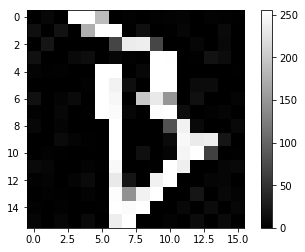

./test/t_b_07.jpg
sum : 0
knn : h
knn_cv : h
clf : a


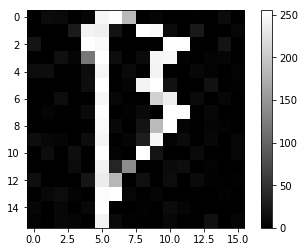

./test/t_b_27.jpg
sum : 3
knn : b
knn_cv : b
clf : b


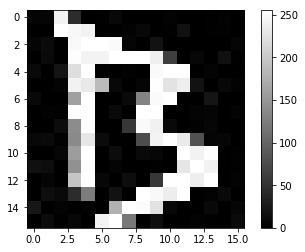

./test/t_b_10.jpg
sum : 0
knn : r
knn_cv : r
clf : r


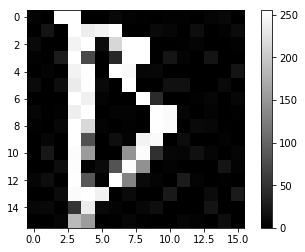

./test/t_b_26.jpg
sum : 2
knn : b
knn_cv : b
clf : y


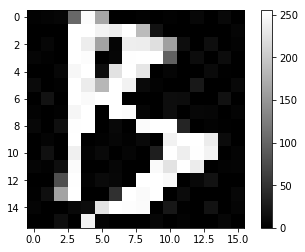

./test/t_b_20.jpg
sum : 3
knn : b
knn_cv : b
clf : b


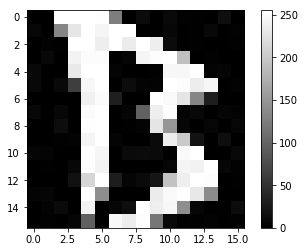

./test/t_b_13.jpg
sum : 3
knn : b
knn_cv : b
clf : b


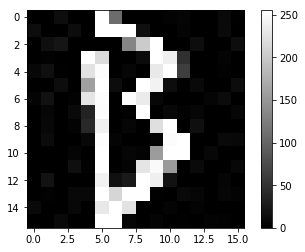

./test/t_b_16.jpg
sum : 0
knn : h
knn_cv : h
clf : h


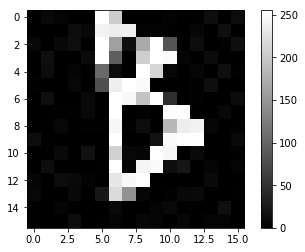

./test/t_b_22.jpg
sum : 3
knn : b
knn_cv : b
clf : b


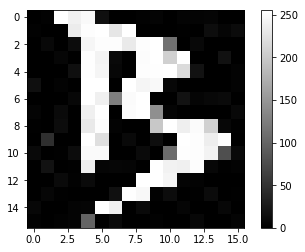

./test/t_b_17.jpg
sum : 3
knn : b
knn_cv : b
clf : b


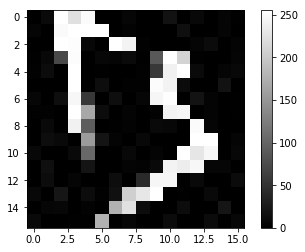

./test/t_b_08.jpg
sum : 3
knn : b
knn_cv : b
clf : b


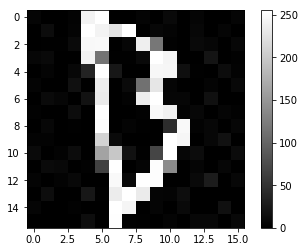

./test/t_b_18.jpg
sum : 3
knn : b
knn_cv : b
clf : b


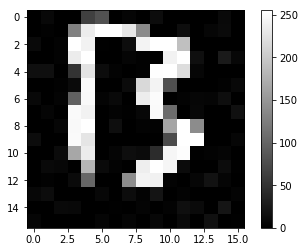

./test/t_b_12.jpg
sum : 0
knn : f
knn_cv : f
clf : f


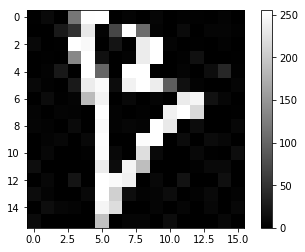

./test/t_b_05.jpg
sum : 3
knn : b
knn_cv : b
clf : b


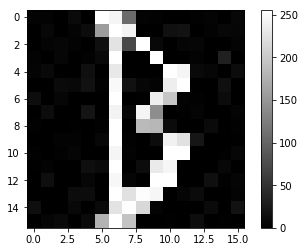

./test/t_b_25.jpg
sum : 3
knn : b
knn_cv : b
clf : b


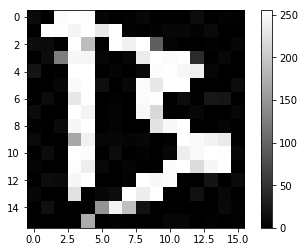

./test/t_b_14.jpg
sum : 0
knn : h
knn_cv : h
clf : h


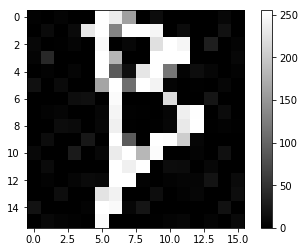

./test/t_b_04.jpg
sum : 0
knn : h
knn_cv : h
clf : p


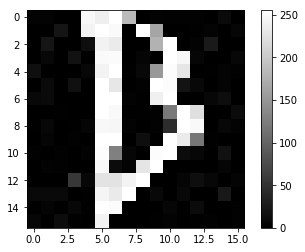

./test/t_b_24.jpg
sum : 3
knn : b
knn_cv : b
clf : b


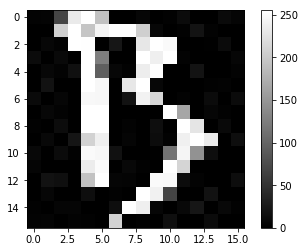

./test/t_b_02.jpg
sum : 0
knn : h
knn_cv : h
clf : a


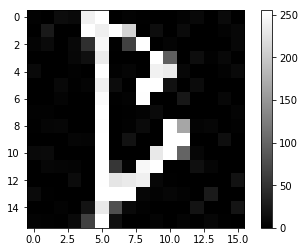

./test/t_b_15.jpg
sum : 0
knn : h
knn_cv : h
clf : h


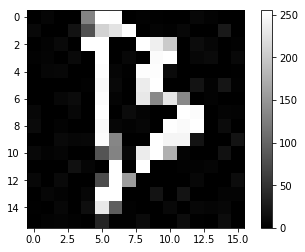

./test/t_b_01.jpg
sum : 0
knn : h
knn_cv : h
clf : h


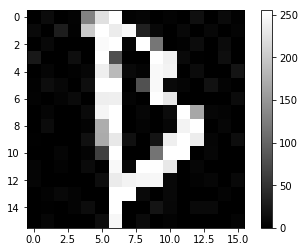

./test/t_b_19.jpg
sum : 3
knn : b
knn_cv : b
clf : b


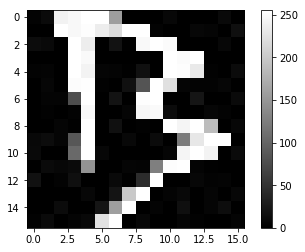

./test/t_b_03.jpg
sum : 0
knn : f
knn_cv : f
clf : r


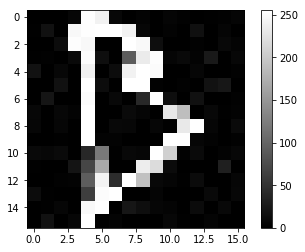

./test/t_b_09.jpg
sum : 3
knn : b
knn_cv : b
clf : b


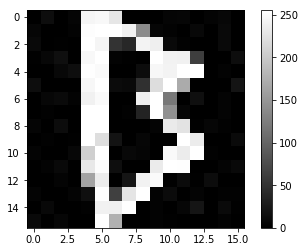

./test/t_b_23.jpg
sum : 3
knn : b
knn_cv : b
clf : b


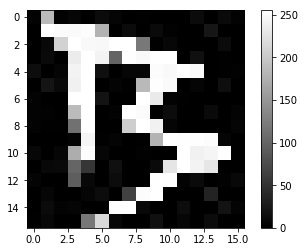

./test/t_b_06.jpg
sum : 1
knn : b
knn_cv : h
clf : r


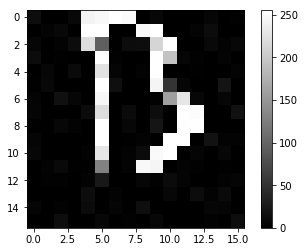

In [126]:
rune_name = 'b'
sel_filter = y_test == rune_name
sel_Xtest = X_test[ sel_filter ]
name_filter = y_name[ sel_filter ]

# for file output
rune_names =[]
filenames =[]
pred_knns =[]
pred_knn_cvs =[]
pred_clfs =[]
pred_sums =[]

for rrr in range(0,sel_Xtest.shape[0]):
    img = sel_Xtest.iloc[rrr,:].values
    filename = name_filter.iloc[ rrr ]
    pred_knn = knn.predict(img.reshape(1,-1))[0]
    pred_knn_cv = knn_cv.predict(img.reshape(1,-1))[0]
    pred_clf = clf.predict(img.reshape(1,-1))[0] 
    pred_sum = sum( pd.Series( [ pred_knn, pred_knn_cv, pred_clf ] ) == rune_name )
    # display
    print( filename )
    print( "sum : " + str( pred_sum ) )
    print( "knn : " + pred_knn )
    print( "knn_cv : " + pred_knn_cv )
    print( "clf : " + pred_clf )
    show_as_image( img )
    # add to output data
    filenames.append( filename )
    pred_knns.append( pred_knn )
    pred_knn_cvs.append( pred_knn_cv )
    pred_clfs.append( pred_clf )
    pred_sums.append( pred_sum )

# save to file
out_filename='./test/out_test_' + rune_name + '.csv'   
nrows = len(filenames)
runes = [rune_name]*nrows
out_test = pd.DataFrame( {'runes' : runes, 'filenames' : filenames, 'pred_sums' : pred_sums, 'pred_knns' : pred_knns, 'pred_knn_cvs' : pred_knn_cvs, 'pred_clfs' : pred_clfs } )
out_test.to_csv( out_filename, index=False )

#### Testing with other images

(6, 46)
(9, 37)
./test/f_test_new_1.jpg
['knn: f']
['knn_cv: f']
['clf_ f']


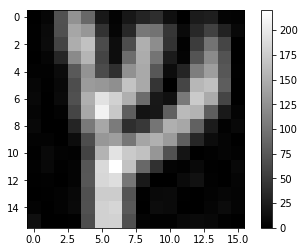

In [155]:
# make input image
in_filename = "./test/f_test_1.jpg"
base_name = "./test/f_test_new_1.jpg"
cut_base_img( in_filename, (50, 50), (16, 16), (10,30), base_name)
gen_img( base_name, base_name, 0, (16, 16) )
X_new = img_to_row( base_name )
y_new = X_new[-1]
X_new = X_new[0:256].astype(np.float)
print( y_new )
print( 'knn: '+ knn.predict(X_new.reshape(1, -1)) )
print( 'knn_cv: '+ knn_cv.predict(X_new.reshape(1, -1)) )
print( 'clf_ '+ clf.predict(X_new.reshape(1, -1)) )
show_as_image(X_new)


# Live classification of webcam images


## Classify after x seconds

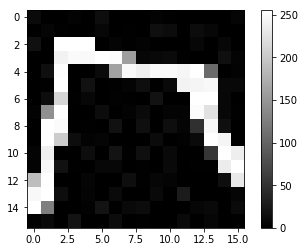

This is a rune for: u


In [29]:
## test webcam
import cv2
import time
cap = cv2.VideoCapture(0)
ts = time.time()

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Draw rectangle
    cv2.rectangle(gray,(220,140),(420,340),(0,255,0),2)
    
    # Display the resulting frame
    cv2.imshow('frame',gray)
    tn = time.time()
    tdiff = tn - ts
    
    if tdiff>8 | (cv2.waitKey(1) & 0xFF == ord('q')):
        crop_img = gray[141:141+198, 221:221+198]
        cv2.imwrite(idir+'blah.jpg',crop_img)
        break
        
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
read_runes([knn, knn_cv, clf], "blah.jpg")

# Future improvements

Other things to add in future:
1. Enrich the training dataset with hand-written runes
2. Add other algorithms - Random Forest, Neural Networks etc